# Neuromodulation dopamine and acetylcholine - acetylcholine  - adaptive - spiking presynaptic neuron

To simulate single neuromodulator in Snudda, firstly, the parameters from Neuromodcell have to been saved in modulations.json and placed in the model dircetory. 


To install snudda, follow the instructions at https://github.com/Hjorthmedh/Snudda/wiki/1.-User-installation

Following installation, the code below will set up the network and the neuromodulatory modulation.

To set the $DATA parameter for snudda, 

In [1]:
import os
os.environ["SNUDDA_DATA"] = "data"

This should be set to the directory where neurons, synapses and other parameters for the network have been placed. Look at the 'data' directory for referenece

Set the directory for where the neurons for the striatum (in this example) are saved

In [2]:
neurons_dir = os.path.abspath(os.path.join("data","neurons"))

We wrote a specific neuromodulation init (based on snuddas init.py), to load the synapses which have had the modulation parameters included into the parameter sets as well as add SNc and dopaminergic neurons to the simulation

In [3]:
from code.neuromodulationInitSNc import neuromodulationInit

network_path = "dopamine-acetylcholine-adaptive-trial-network"
config_name= os.path.join(network_path,"network-config.json")
cnc = neuromodulationInit(config_file=config_name,random_seed=12345)

cnc.define_striatum_neuromodulation(num_dSPN=5, num_iSPN=5, num_ChIN=1, volume_type="cube",neurons_dir=neurons_dir)
cnc.define_snc(nNeurons=4,neuron_dir=neurons_dir)
dirName = os.path.dirname(config_name)

if not os.path.exists(dirName):
    os.makedirs(dirName)
    
cnc.write_json(config_name)

Using cube for striatum
Adding neurons: dSPN from dir /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/data/neurons/striatum/ispn
Adding neurons: ChIN from dir /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/data/neurons/striatum/chin
Adding neurons: DopaminergicAxon from dir /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/data/neurons/SNc
Writing dopamine-acetylcholine-adaptive-trial-network/network-config.json


Then we place the neurons within the network (as we are running this locally we are limiting the network to 21 neurons). We then detect the potential synapses (by appositions between axons and dendrites) and then remove (prune) to reproduce the reported connectivity.  

Reading SNUDDA_DATA=None from dopamine-acetylcholine-adaptive-trial-network/network-config.json
Reading SNUDDA_DATA=data from environment variable $SNUDDA_DATA
Reading SNUDDA_DATA=None from dopamine-acetylcholine-adaptive-trial-network/network-config.json
Reading SNUDDA_DATA=data from environment variable $SNUDDA_DATA
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 21/64 (15 neurons)
Processing hyper voxel : 5/64 (15 neurons)
Processing hyper voxel : 22/64 (14 neurons)
Processing hyper voxel : 25/64 (10 neurons)
Processing hyper voxel : 20/64 (10 neurons)
Processing hyper voxel : 17/64 (10 neurons)
Processing hyper voxel : 6/64 (9 neurons)
Processing hyper voxel : 18/64 (8 neurons)
Processing hyper voxel : 37/64 (7 neurons)
Processing hyper voxel : 33/64 (6 neurons)
Processing hyper voxel : 1/64 (5 neurons)
Processing hyper voxel : 16/64 (5 neurons)
Processing hyper voxel : 9/64 (3 neurons)
Processing hyper voxel : 36/64 (3 neurons)
Processing hyper v

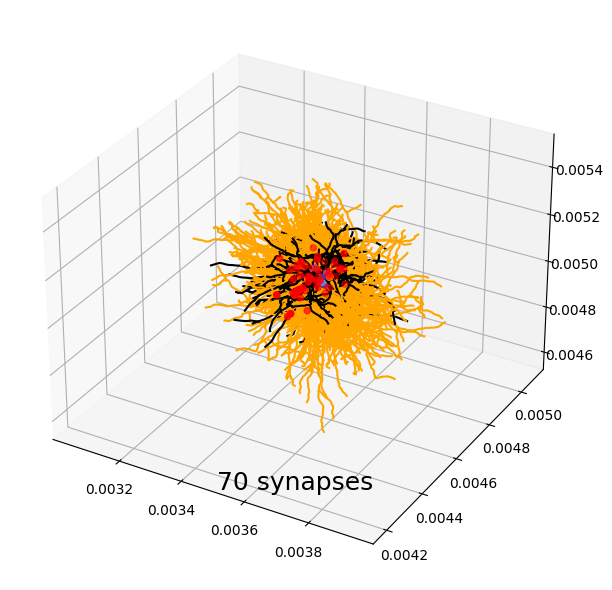

In [4]:
from snudda.place import SnuddaPlace
sp = SnuddaPlace(network_path=network_path)
sp.parse_config()
sp.write_data()

from snudda.detect import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

from snudda.plotting.plot_network import PlotNetwork
pn = PlotNetwork(network_path)
pn.plot()
pn.close()

Following the assembly of the circuit, we set up the neuromodulatory connections which are needed for adaptive neuromodulation. The user defines the connections which are needed and the name of the connector, here we chose concACh and concDA. For the control, we set the weight as 0, otherwise 1e-2

In [20]:
# Set up neuromodulation per synapse

from snudda.neuromodulation.modulation_synapse import  NeuromodulationSynapse

sw = NeuromodulationSynapse()
sw.set_weight(weight=10)

# Acetylcholine

sw.set_connection_type(connector="concACh", neuromodulation_key="ACh")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="dSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"],
                   "axon": ["Im_ms"]},
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"],
                   "axon": ["Im_ms"]},
               type_connection="spiking-concentration")

# Dopamine

sw.set_connection_type(connector="concDA", neuromodulation_key="DA")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="dSPN",
               ion_channels={
                   "soma": ["kas_ms", "kaf_ms", "can_ms"],
                   "dendrite": ["kaf_ms", "kas_ms"],
                   "axon": []},
               receptors={"tmGabaA": {"maxMod": 0.8},
                          "tmGlut": {"maxMod_AMPA": 1.2,
                                     "maxMod_NMDA": 1.3,
                                     "failRate": 0.7}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"],
                   "dendrite": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms",
                                "can_ms", "car_ms"],
                   "axon": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"]},
               receptors={"tmGabaA": {"maxMod": 0.99},
                          "tmGlut": {"maxMod_AMPA": 0.8,
                                     "maxMod_NMDA": 0.8,
                                     "failRate": 1.3}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.save(dir_path=os.path.join("data","modulation"), name="DA-ACh.json")


In [6]:
# Set up neuromodulation per synapse

from snudda.neuromodulation.modulation_synapse import  NeuromodulationSynapse

sw = NeuromodulationSynapse()
sw.set_weight(weight=0)

# Acetylcholine

sw.set_connection_type(connector="concACh", neuromodulation_key="ACh")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="dSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"],
                   "axon": ["Im_ms"]},
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="ACh",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "cal12_ms", "cal13_ms", "can_ms"],
                   "dendrite": ["kir_ms", "cal12_ms", "cal13_ms"],
                   "axon": ["Im_ms"]},
               type_connection="spiking-concentration")

# Dopamine

sw.set_connection_type(connector="concDA", neuromodulation_key="DA")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="dSPN",
               ion_channels={
                   "soma": ["kas_ms", "kaf_ms", "can_ms"],
                   "dendrite": ["kaf_ms", "kas_ms"],
                   "axon": []},
               receptors={"tmGabaA": {"maxMod": 0.8},
                          "tmGlut": {"maxMod_AMPA": 1.2,
                                     "maxMod_NMDA": 1.3,
                                     "failRate": 0.7}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.add_cell_modulation(neuromodulation_key="DA",
               cell="iSPN",
               ion_channels={
                   "soma": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"],
                   "dendrite": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms",
                                "can_ms", "car_ms"],
                   "axon": ["kir_ms", "kas_ms", "kaf_ms", "naf_ms", "cal12_ms", "cal13_ms", "can_ms",
                            "car_ms"]},
               receptors={"tmGabaA": {"maxMod": 0.99},
                          "tmGlut": {"maxMod_AMPA": 0.8,
                                     "maxMod_NMDA": 0.8,
                                     "failRate": 1.3}},
               extrinsic=["CorticalBase", "CorticalSignal", "Thalamic"],
               type_connection="spiking-concentration")

sw.save(dir_path=os.path.join("data","modulation"), name="DA-ACh-control.json")


Compile the mechanisms used in the simulation

In [7]:
!rm -r x86_64/
!nrnivmodl mechanisms-modulation-ptr/

Creating x86_64 directory for .o files.

/home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples
ls: cannot access 'mechanisms-modulation-ptr//*.inc': No such file or directory
mechanisms-modulation-ptr//bk_ch.mod mechanisms-modulation-ptr//bk_fs.mod mechanisms-modulation-ptr//bk_ms.mod mechanisms-modulation-ptr//ca_ch.mod mechanisms-modulation-ptr//cadyn_fs.mod mechanisms-modulation-ptr//cadyn_ms.mod mechanisms-modulation-ptr//cal12_ms.mod mechanisms-modulation-ptr//cal12_ms_ptr.mod mechanisms-modulation-ptr//cal13_ms.mod mechanisms-modulation-ptr//cal13_ms_ptr.mod mechanisms-modulation-ptr//cal_ch.mod mechanisms-modulation-ptr//cal_ch_ptr.mod mechanisms-modulation-ptr//caldyn_ms.mod mechanisms-modulation-ptr//can_fs.mod mechanisms-modulation-ptr//can_ms.mod mechanisms-modulation-ptr//can_ms_ptr.mod mechanisms-modulation-ptr//cap_ch.mod mechanisms-modulation-ptr//cap_ch_ptr.mod mechanisms-modulation-ptr//caq_fs.mod mechanisms-modulation-ptr//caq_ms.mod mechanisms-modulati

Restart the kernel (if the assembly and generation of input and simulation are in different notebooks - THIS STEP IS NOT NEEDED)

In [8]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
restartkernel()


In [9]:
from snudda.input import SnuddaInput
import os

os.environ["SNUDDA_DATA"] = "data"

network_path = "dopamine-acetylcholine-adaptive-trial-network"

si = SnuddaInput(network_path=network_path, 
                 input_config_file=os.path.join("data","external_input","external-input-trial.json"),
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=None from dopamine-acetylcholine-adaptive-trial-network/network-config.json
Reading SNUDDA_DATA=data from dopamine-acetylcholine-adaptive-trial-network/network-synapses.hdf5
Loading 15 neurons with 70 synapses and 0 gap junctions
Writing spikes to dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5


We then simulate the dopamine-acetylcholine and control case using Snudda

In [21]:
import os

os.environ["SNUDDA_DATA"] = "data"

In [22]:
!snudda simulate dopamine-acetylcholine-adaptive-trial-network --time 3.0 --outputFile "dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.hdf5" --neuromodulation "data/modulation/DA-ACh.json" --verbose

/usr/local/nrn/lib/python/neuron/__init__.py:430: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(nt_dlls) is 0:
/usr/local/nrn/lib/python/neuron/__init__.py:432: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if h.nrnversion(8).find('i686') is 0:
numprocs=1
Using input file dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
Reading SNUDDA_DATA=None from dopamine-acetylcholine-adaptive-trial-network/network-config.json
Reading SNUDDA_DATA=data from dopamine-acetylcholine-adaptive-trial-network/network-synapses.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/DA-ACh.json', output_file='dopamine-acetylc

In [12]:
!snudda simulate dopamine-acetylcholine-adaptive-trial-network --time 3.0 --outputFile 'dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5' --neuromodulation "data/modulation/DA-ACh-control.json"

/usr/local/nrn/lib/python/neuron/__init__.py:430: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(nt_dlls) is 0:
/usr/local/nrn/lib/python/neuron/__init__.py:432: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if h.nrnversion(8).find('i686') is 0:
numprocs=1
Using input file dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
Reading SNUDDA_DATA=None from dopamine-acetylcholine-adaptive-trial-network/network-config.json
Reading SNUDDA_DATA=data from dopamine-acetylcholine-adaptive-trial-network/network-synapses.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation='data/modulation/DA-ACh-control.json', output_file='dopamine

Following the simulation, we plot the simulations individually using code from snudda. First, the dopamine-acetylcholine modulated simulation

In [ ]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = "dopamine-acetylcholine-adaptive-trial-network"
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="ChIN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)

Loading network info from dopamine-acetylcholine-adaptive-trial-network/network-synapses.hdf5
Loading 15 neurons with 70 synapses and 0 gap junctions
Loading input info from dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
Loading dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.hdf5
Traceback (most recent call last):
  File "/home/jofrony/miniconda3/envs/py38/lib/python3.8/site-packages/snudda/utils/load_network_simulation.py", line 146, in get_data
    data[inid] = self.network_simulation_file["neurons"][snid][data_type][()].T.copy()
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/home/jofrony/miniconda3/envs/py38/lib/python3.8/site-packages/h5py/_hl/dataset.py", line 768, in __getitem__
    return self._fast_reader.read(args)
  File "h5py/_selector.pyx", line 376, in h5py._selector.Reader.read
OSError: Can't read data (inflate()

Second, we plot the control simulation. 

Loading network info from dopamine-acetylcholine-adaptive-trial-network/network-synapses.hdf5
Loading 15 neurons with 70 synapses and 0 gap junctions
Loading input info from dopamine-acetylcholine-adaptive-trial-network/input-spikes.hdf5
Loading dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5
!!! Excluding first 0 s from the plot
Plotting traces: [5, 6, 7, 12, 13]
Plotted 5 traces (total 15)
Saving to figure /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/dopamine-acetylcholine-adaptive-trial-network/figures/Network-voltage-trace--dSPN-5-6-7-12-13.pdf


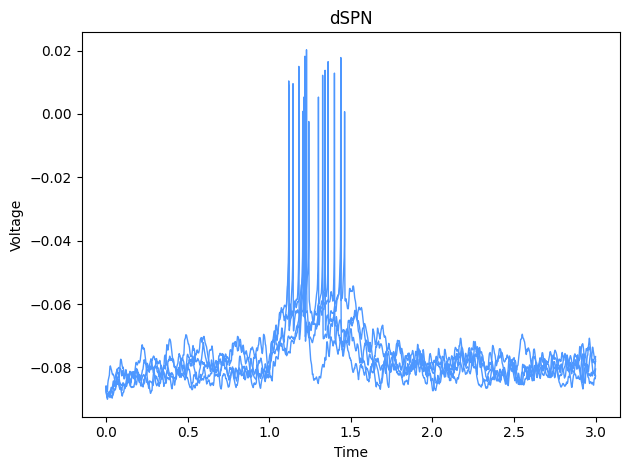

!!! Excluding first 0 s from the plot
Plotting traces: [2, 8, 9, 10, 11]
Plotted 5 traces (total 15)
Saving to figure /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/dopamine-acetylcholine-adaptive-trial-network/figures/Network-voltage-trace--iSPN-2-8-9-10-11.pdf


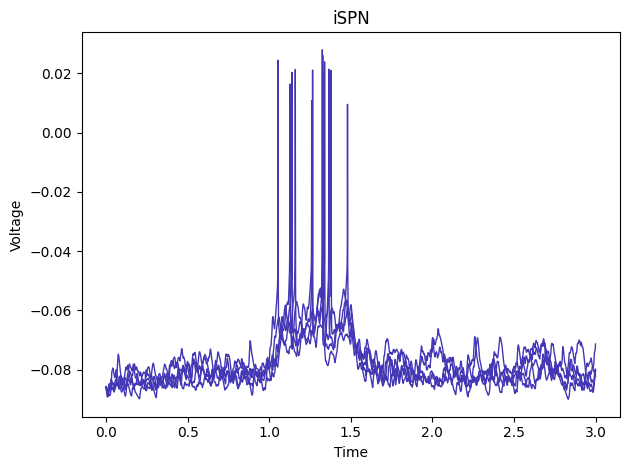

!!! Excluding first 0 s from the plot
Plotting traces: [14]
Plotted 1 traces (total 15)
Saving to figure /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/dopamine-acetylcholine-adaptive-trial-network/figures/Network-voltage-trace--ChIN-14.pdf


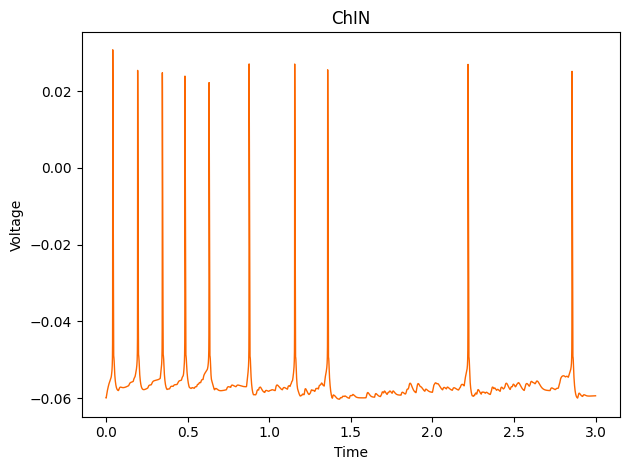

!!! Excluding first 0 s from the plot
Plotting traces: [0, 1, 3, 4]
Plotted 4 traces (total 15)
Saving to figure /home/jofrony/Dropbox/Repositories/Neuromodulation-software/examples/dopamine-acetylcholine-adaptive-trial-network/figures/Network-voltage-trace--DopaminergicAxon-0-1-3-4.pdf


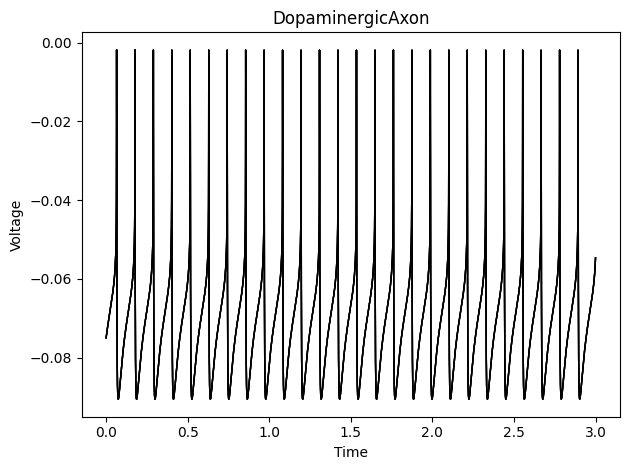

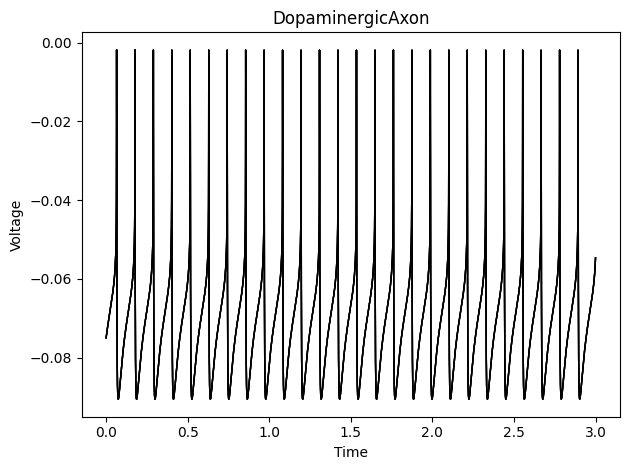

In [14]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  
skip_time = 0  
num_traces_max = 10

network_path = "dopamine-acetylcholine-adaptive-trial-network"
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "simulation", "network-voltage-DA-ACh-trial-control.hdf5")

pl = PlotTraces(output_file=volt_file_name,network_file=network_file)

pl.plot_trace_neuron_type(neuron_type="dSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="iSPN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="ChIN", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)
pl.plot_trace_neuron_type(neuron_type="DopaminergicAxon", num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)


We need load and plot control (black) and dopamine/acetylcholine modulated (red). We see clear effect on dSPN, which should depolarise upon dopamine modulation and the tonic depolarisation following muscarinic modulation, while iSPN do not have a clear effect from dopamine, but muscarinic modulation is tonic and depolarises the cell. FS have quite a large response to dopamine modulation, which is also seen in the network

In [15]:
os.makedirs(os.path.join("dopamine-acetylcholine-adaptive-trial-network","analysis"), exist_ok=True)

In [16]:
from code.plot import plot_dopamine_acetylcholine_control
from code.compare import compareTraces

network_path = "dopamine-acetylcholine-adaptive-trial-network"

fn = [os.path.join(network_path, "simulation","network-voltage-DA-ACh-trial-control.hdf5"),
     os.path.join(network_path ,"simulation", "network-voltage-DA-ACh-trial.hdf5")]

nf = [os.path.join(network_path, "network-synapses.hdf5"),
     os.path.join(network_path, "network-synapses.hdf5")]


kl = compareTraces(fileNames=fn,
                   networkFiles=nf,labels=["control", "DA-ACh"],colours=["black","red"])

Loading dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial-control.hdf5
Loading dopamine-acetylcholine-adaptive-trial-network/simulation/network-voltage-DA-ACh-trial.hdf5


In [17]:
os.makedirs(os.path.join(network_path, "analysis"), exist_ok=True)

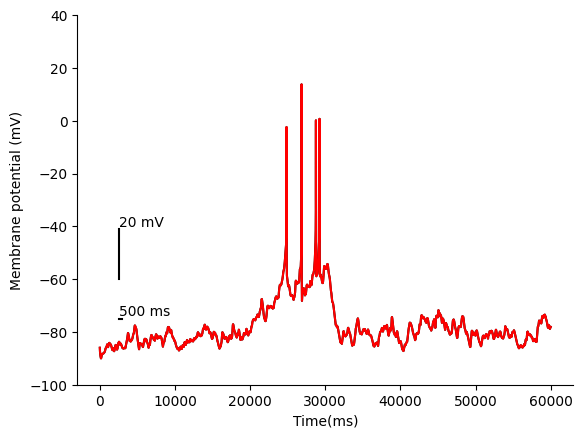

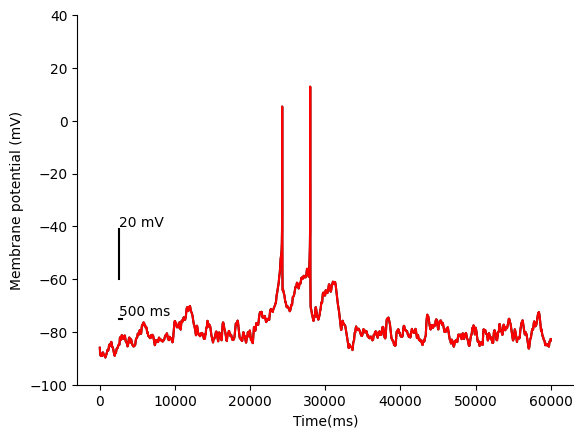

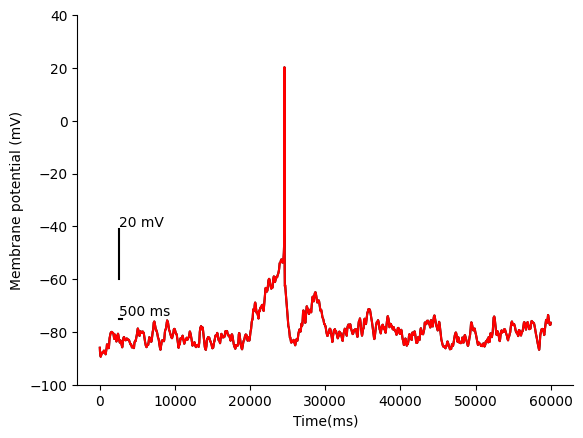

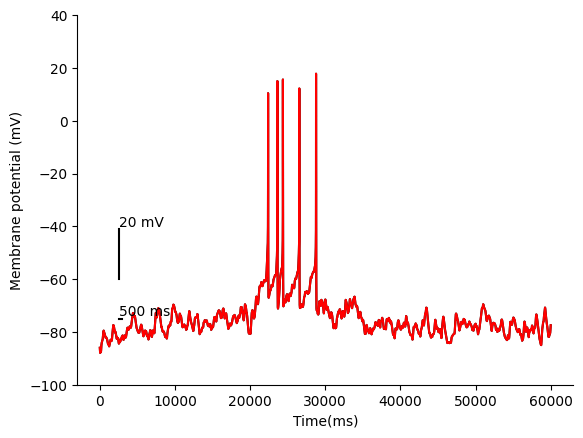

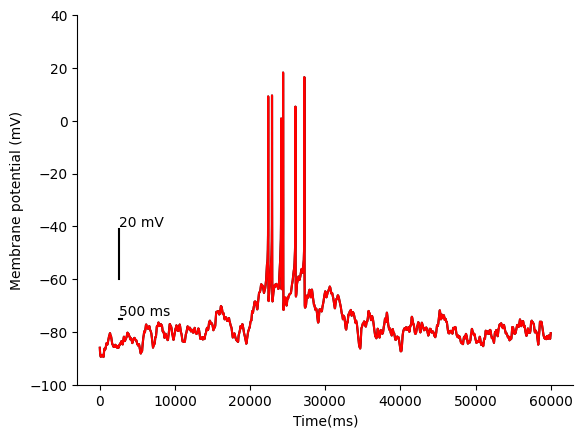

In [18]:
plot_dopamine_acetylcholine_control(kl,type_cell='dSPN', network_path=network_path)


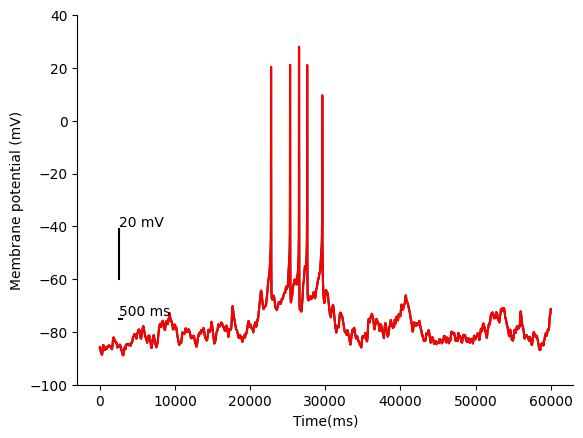

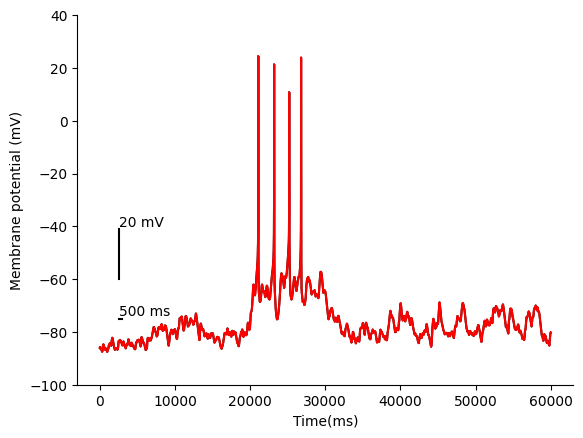

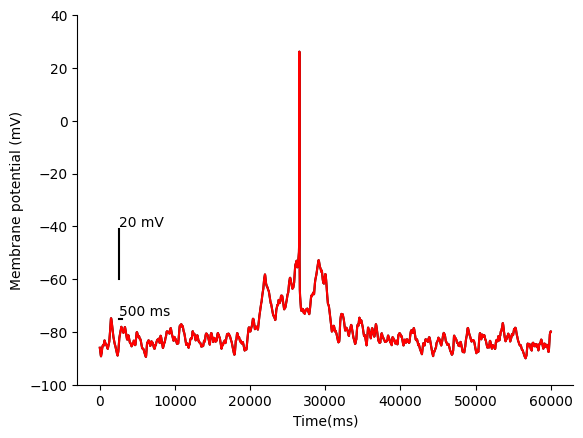

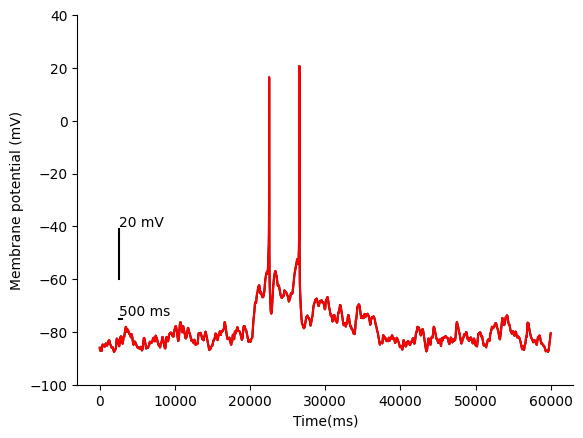

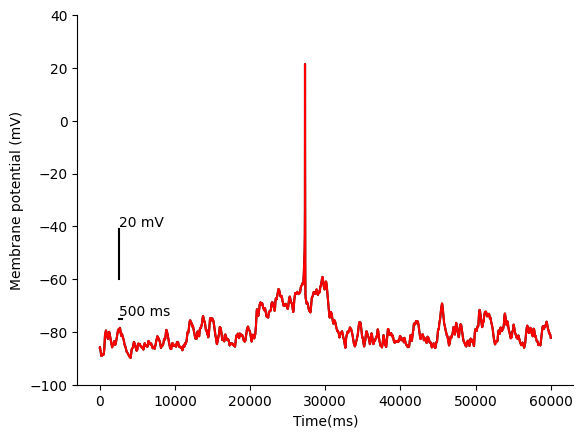

In [19]:
plot_dopamine_acetylcholine_control(kl,type_cell='iSPN', network_path=network_path)